# Tutorial 4

## Mean Squared Displacement (MSD)


As an atom travels it is interrupted by collisions with other atoms and this prevents it from travelling in a straight line. In the end the particle moves in a way resembling a random walk. In mathmatics a random walk is a series of steps, where each step is taken in a random direction. Albert Einstein showed that the mean square of the distance travelled by an atom following a random walk is proportional to the time elapsed. This relationship can be written as 

\begin{align}
\Big \langle r_{i}^{2} \big \rangle & = 2 D_t + C 
\end{align}

where 

\begin{align}
\Big \langle r_{i}^{2} \big \rangle = \frac{1}{3} \Big< | r_{i}(t) - r_{i}(0) |^2 \Big>.
\end{align}


$\Big \langle r^2 \big \rangle$ is the mean squared distance, t is time, D is the diffusion rate and C is a constant. If $\Big \langle r^2 \big \rangle$ s plotted as a function of time, the gradient of the curve obtained is equal to 6 times the self-diffusion coefficient of particle i. 
The state of the matter effects the shape of the MSD plot, solids, where little to no diffusion is occuring, has a flat MSD profile. In a liquid however, the particles diffusion randomly and the gradient of the curve is proportional to the diffusion coefficient. 

In [1]:
from polypy import read as rd
from polypy import msd as msd
from polypy import utils as ut
from polypy import write as wr
import numpy as np
import seaborn as sns
sns.set(style="white")
sns.set_style("ticks")

In [2]:
timestep = 0.25

In [3]:
#data = rd.read_history("example_data/HISTORY", ["F"])
data = rd.read_history("../../../OLD/data/HISTORY_F", ["F"])

In [4]:
msd_data = msd.msd(data, timestep)

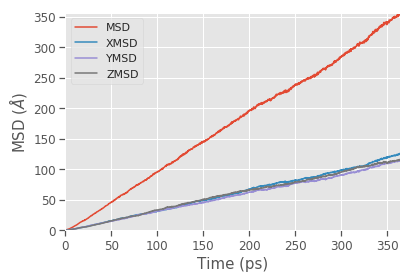

In [5]:
wr.msd_plot(msd_data, set_style="ggplot")

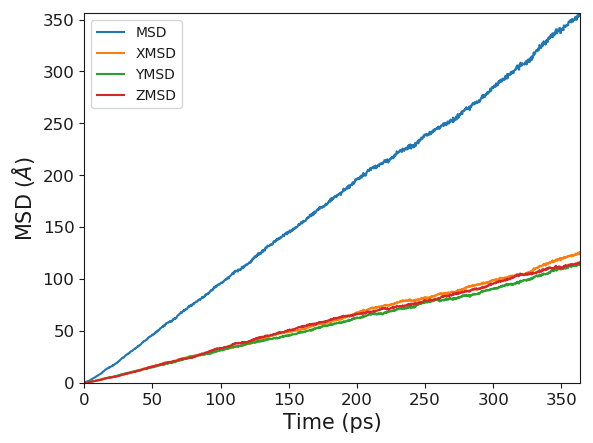

In [6]:
wr.msd_plot(msd_data, output="MSD_Theory.png")

In [7]:
Diff = ut.linear_regression(msd_data['time'], msd_data['msd'])
Diffusion_Coefficient = ut.three_d_diffusion_coefficient(Diff)

XDiff = ut.linear_regression(msd_data['time'], msd_data['xmsd'])
XDiffusion_Coefficient = ut.three_d_diffusion_coefficient(XDiff)

YDiff = ut.linear_regression(msd_data['time'], msd_data['ymsd'])
YDiffusion_Coefficient = ut.three_d_diffusion_coefficient(YDiff)

ZDiff = ut.linear_regression(msd_data['time'], msd_data['zmsd'])
ZDiffusion_Coefficient = ut.three_d_diffusion_coefficient(ZDiff)

In [8]:
print("Three Dimensional Diffusion Coefficient", Diffusion_Coefficient, "")
print("One Dimensional Diffusion Coefficient in X", XDiffusion_Coefficient)
print("One Dimensional Diffusion Coefficient in Y", YDiffusion_Coefficient)
print("One Dimensional Diffusion Coefficient in Z", ZDiffusion_Coefficient)


Three Dimensional Diffusion Coefficient 1.6072914251048065 
One Dimensional Diffusion Coefficient in X 0.5624152384459938
One Dimensional Diffusion Coefficient in Y 0.5128264260667497
One Dimensional Diffusion Coefficient in Z 0.532049760592063


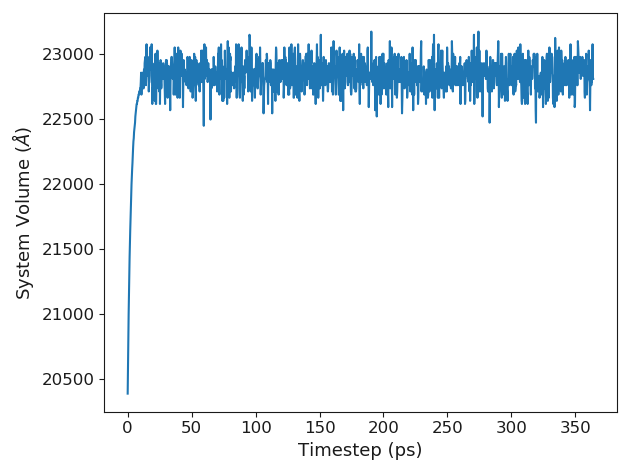

In [9]:
volume, time = ut.system_volume(data, timestep)
wr.volume_plot(time, volume)
Average_Volume = np.mean(volume[100:])

In [10]:
Number_of_Charge_Carriers = data['natoms']

In [11]:
Ionic_Conductivity = ut.conductivity(Number_of_Charge_Carriers, Average_Volume, Diffusion_Coefficient, 1500)

In [12]:
print("Ionic Conductivity :", Ionic_Conductivity)

Ionic Conductivity : 86.59670313170037


In [13]:
print("Resistivity :", (1 / Ionic_Conductivity)) 

Resistivity : 0.01154778373582136
